In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import display, Markdown

us_df = pd.read_csv("../data/US_youtube_trending_data.csv")
gb_df = pd.read_csv("../data/GB_youtube_trending_data.csv")


**For deep dive analysis of the number of subscribers, requires API, Here is the example:
https://www.analyticssteps.com/blogs/how-extract-analyze-youtube-data-using-youtube-api
I need duration of the video, refer to this:
https://medium.com/geekculture/extracting-daily-youtube-trending-video-statistics-5de5f9fdc1b7
**

In [2]:
#US first 10 records
display(us_df.head(10))

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


In [3]:
#UK first 20 records
display(gb_df.head(10))

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...
5,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89192,855,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
6,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655449,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
7,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156910,5856,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
8,ZNfeMbO_AHo,Popek ft. Dr Alban - It's My Life (prod. Clay...,2020-08-12T10:00:09Z,UC8Mh9UmrIaQPEcybdWvQsOg,KrólAlbaniiTV,24,2020-08-12T00:00:00Z,[None],277506,27420,617,1268,https://i.ytimg.com/vi/ZNfeMbO_AHo/default.jpg,False,False,Nowa wersja kultowego utworu z lat 90’.Posłuch...
9,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [4]:
check_us_df = us_df.sort_values(by=['publishedAt'], ascending=False)
#2020-08-11T19:20:14Z
#us_df['publishedAt_date_time'] = pd.to_datetime(us_df['publishedAt'], format='%Y-%m-%dT%H%M%SZ')
#check_us_df['time_used_for_trending'] = us_df['trending_date']-us_df['publishedAt']
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return "".join(num)
check_us_df['publishedAt'] = check_us_df['publishedAt'].apply(lambda x: find_number(x))
check_us_df['publishedAt_date'] = check_us_df['publishedAt'].str.slice(0, 8)
check_us_df['publishedAt'] = pd.to_datetime(check_us_df['publishedAt'], format='%Y%m%d%H%M%S')
check_us_df['publishedAt_date'] = pd.to_datetime(check_us_df['publishedAt_date'], format='%Y%m%d')
check_us_df['trending_date'] = check_us_df['trending_date'].apply(lambda x: find_number(x))
check_us_df['trending_date'] = pd.to_datetime(check_us_df['trending_date'], format='%Y%m%d%H%M%S')
check_us_df['publishedAt_trending_diff'] = check_us_df['trending_date'] - check_us_df['publishedAt_date']
check_us_df = check_us_df.sort_values(by=['publishedAt_trending_diff'], ascending=True)
fast_trending_video = check_us_df[check_us_df['publishedAt_trending_diff']=='0 days']['video_id'].count()
print('number of video listed as trending video less than 1 day:', fast_trending_video)
print('number of video listed as trending video less than 1 day ratio:', (fast_trending_video/check_us_df.shape[0])*100, '%')
display(check_us_df.head(5))


number of video listed as trending video less than 1 day: 1093
number of video listed as trending video less than 1 day ratio: 0.986542228159327 %


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishedAt_date,publishedAt_trending_diff
26213,yxc2pLLXMH0,Highlights | Cavani & Martial send the Reds th...,2020-12-24 01:00:08,UC6yW44UGJJBvYTlfC7CRg2Q,Manchester United,17,2020-12-24,manchester united|mufc|man utd|manutd|mu|ggmu|...,2027203,51858,794,1894,https://i.ytimg.com/vi/yxc2pLLXMH0/default.jpg,False,False,Enjoy the best of the action as goals from Edi...,2020-12-24,0 days
14063,gi6TH9hnfH4,Everyone Wants Cami Clune After She Sings Bon ...,2020-10-21 01:12:46,UCpdK1NLHxEUGXc1gq2NxkTw,The Voice,24,2020-10-21,the voice|watch the voice|the voice blinds per...,189648,5937,45,299,https://i.ytimg.com/vi/gi6TH9hnfH4/default.jpg,False,False,Cami Clune performs Skinny Love during The Voi...,2020-10-21,0 days
19800,MPbUaIZAaeA,"Shawn Mendes, Justin Bieber - Monster",2020-11-20 05:00:11,UC4-TgOSMJHn-LtY4zCzbQhw,ShawnMendesVEVO,10,2020-11-20,Shawn|Mendes|Justin|Bieber|Monster|LP4-5|PS/|I...,5537878,1152292,9810,74229,https://i.ytimg.com/vi/MPbUaIZAaeA/default.jpg,False,False,Listen to “Monster” now: https://Monster.lnk.t...,2020-11-20,0 days
32816,0-q1KafFCLU,[MV] IU(아이유) _ Celebrity,2021-01-27 09:00:00,UCweOkPb1wVVH0Q0Tlj4a5Pw,1theK (원더케이),24,2021-01-27,K-POP|Kpop|1theK|원더케이|Original|1theK Original|...,4424198,825836,4840,51876,https://i.ytimg.com/vi/0-q1KafFCLU/default.jpg,False,False,"[MV] IU(아이유) _ CelebrityK-POP Wonderland, 1the...",2021-01-27,0 days
10202,fHeQemJJQII,Shawn Mendes - Wonder,2020-10-02 04:00:11,UC4-TgOSMJHn-LtY4zCzbQhw,ShawnMendesVEVO,10,2020-10-02,Shawn|Mendes|Wonder|LP4-5|PS/|Island|Pop,2906462,647689,4008,55751,https://i.ytimg.com/vi/fHeQemJJQII/default.jpg,False,False,New single WONDER out nowListen now: https://W...,2020-10-02,0 days


,publishedAt_trending_diff,video_id
0,0 days,1093
1,1 days,12753
2,2 days,17396
3,3 days,18261
4,4 days,18792
5,5 days,17386
6,6 days,12993
7,7 days,7054
8,8 days,2797
9,9 days,1069


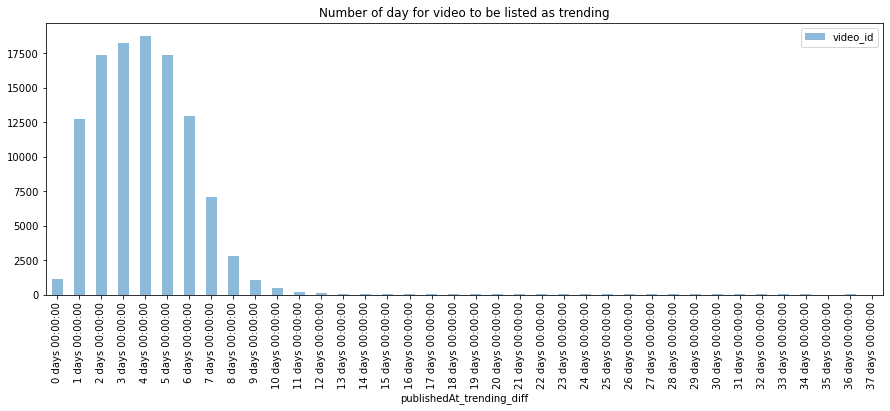

In [5]:
num_day_to_trending_df =  check_us_df[['video_id','publishedAt_trending_diff']].groupby('publishedAt_trending_diff', as_index=False).count()
display(num_day_to_trending_df)
num_day_to_trending_graph = num_day_to_trending_df.plot.bar(x='publishedAt_trending_diff', y='video_id', figsize=(15,5), title='Number of day for video to be listed as trending', alpha=0.5)                

In [6]:
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    result = list(map(lambda x: x.lower(), result))
    filter_result = []
    for i in result:
        if "_" not in i:
            filter_result.append(i)
    return filter_result
check_us_df['title_keywords']=check_us_df['title'].apply(lambda x : search_words(x))
display(check_us_df)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishedAt_date,publishedAt_trending_diff,title_keywords
26213,yxc2pLLXMH0,Highlights | Cavani & Martial send the Reds th...,2020-12-24 01:00:08,UC6yW44UGJJBvYTlfC7CRg2Q,Manchester United,17,2020-12-24,manchester united|mufc|man utd|manutd|mu|ggmu|...,2027203,51858,794,1894,https://i.ytimg.com/vi/yxc2pLLXMH0/default.jpg,False,False,Enjoy the best of the action as goals from Edi...,2020-12-24,0 days,"[highlights, cavani, martial, send, the, reds,..."
14063,gi6TH9hnfH4,Everyone Wants Cami Clune After She Sings Bon ...,2020-10-21 01:12:46,UCpdK1NLHxEUGXc1gq2NxkTw,The Voice,24,2020-10-21,the voice|watch the voice|the voice blinds per...,189648,5937,45,299,https://i.ytimg.com/vi/gi6TH9hnfH4/default.jpg,False,False,Cami Clune performs Skinny Love during The Voi...,2020-10-21,0 days,"[everyone, wants, cami, clune, after, she, sin..."
19800,MPbUaIZAaeA,"Shawn Mendes, Justin Bieber - Monster",2020-11-20 05:00:11,UC4-TgOSMJHn-LtY4zCzbQhw,ShawnMendesVEVO,10,2020-11-20,Shawn|Mendes|Justin|Bieber|Monster|LP4-5|PS/|I...,5537878,1152292,9810,74229,https://i.ytimg.com/vi/MPbUaIZAaeA/default.jpg,False,False,Listen to “Monster” now: https://Monster.lnk.t...,2020-11-20,0 days,"[shawn, mendes, justin, bieber, monster]"
32816,0-q1KafFCLU,[MV] IU(아이유) _ Celebrity,2021-01-27 09:00:00,UCweOkPb1wVVH0Q0Tlj4a5Pw,1theK (원더케이),24,2021-01-27,K-POP|Kpop|1theK|원더케이|Original|1theK Original|...,4424198,825836,4840,51876,https://i.ytimg.com/vi/0-q1KafFCLU/default.jpg,False,False,"[MV] IU(아이유) _ CelebrityK-POP Wonderland, 1the...",2021-01-27,0 days,"[mv, iu, 아이유, celebrity]"
10202,fHeQemJJQII,Shawn Mendes - Wonder,2020-10-02 04:00:11,UC4-TgOSMJHn-LtY4zCzbQhw,ShawnMendesVEVO,10,2020-10-02,Shawn|Mendes|Wonder|LP4-5|PS/|Island|Pop,2906462,647689,4008,55751,https://i.ytimg.com/vi/fHeQemJJQII/default.jpg,False,False,New single WONDER out nowListen now: https://W...,2020-10-02,0 days,"[shawn, mendes, wonder]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95989,nLxmuh6wCVY,Highlights: Manchester United 0-5 Liverpool | ...,2021-10-24 21:06:53,UC9LQwHZoucFT94I2h6JOcjw,Liverpool FC,17,2021-11-29,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,12605757,211952,8919,11822,https://i.ytimg.com/vi/nLxmuh6wCVY/default.jpg,False,False,Watch highlights of Liverpool's sensational 5-...,2021-10-24,36 days,"[highlights, manchester, united, liverpool, sa..."
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,2021-07-03,36 days,"[turn, into, orbeez, tutorial, shorts]"
38577,wY6UyatwVTA,"India claim stunning series win, end Australia...",2021-01-19 08:21:09,UCkBY0aHJP9BwjZLDYxAQrKg,cricket.com.au,17,2021-02-24,Australia|India|day five|fourth Test|Gabba|hig...,38392855,815258,26267,52339,https://i.ytimg.com/vi/wY6UyatwVTA/default.jpg,False,False,Rishabh Pant was the hero as an injury-ravaged...,2021-01-19,36 days,"[india, claim, stunning, series, win, end, aus..."
74390,vrRfBmMWpLY,Golden Buzzer: 9-Year-Old Victory Brinker Make...,2021-07-07 01:58:39,UCT2X19JJaJGUN7mrYuImANQ,America's Got Talent,24,2021-08-12,TV Series|Hilarious Music Songs|Highlights|Sim...,10183905,195020,5584,12211,https://i.ytimg.com/vi/vrRfBmMWpLY/default.jpg,False,False,"For the first time EVER, the judges and host a...",2021-07-07,36 days,"[golden, buzzer, year, old, victory, brinker, ..."


In [7]:
title_keyword_list = []
for wordlist in check_us_df['title_keywords'].tolist():
    for word in wordlist:
        title_keyword_list.append(word)


unique_title_keys = set(title_keyword_list)
print('total number of keywords:', len(title_keyword_list))
print('total number of unique keywords:', len(unique_title_keys))
title_key_word_count_list = []
for i in title_keyword_list:
    title_key_word_count_list.append(1)
title_keyword_df = pd.DataFrame(data=title_keyword_list, columns=['title_keyword'])
title_keyword_df['count'] = title_key_word_count_list
title_keyword_count_df = title_keyword_df[['title_keyword','count']].groupby('title_keyword', as_index=False).count()
title_keyword_count_df = title_keyword_count_df.sort_values(by='count', ascending=False)
display(title_keyword_count_df.head(50))


total number of keywords: 881028
total number of unique keywords: 17144


,title_keyword,count
14853,the,25720
10392,official,14218
15931,video,12625
0,a,11771
15066,to,11157
12719,s,11036
7175,in,10992
7054,i,10835
10379,of,7614
16063,vs,6068
